In [84]:
%load_ext autoreload
%autoreload 2
from imports.networks import *
from imports.data import *
from imports.params import p
from imports.utility import *
# from os import listdir
# import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
sw_path = "flamingo_0077/flamingo_0077.hdf5"
data = Data(p, sw_path=sw_path)
filepath = f"{p['base_data_path']}/obs_data_{p_to_filename(p)}_M1e13_rad2Mpc"
data.make_obs_dataset(filepath=filepath, channel="2chan", target="TotalMass")

In [87]:
model = Model(p, lr=0.00001, batch_size=16)
# p["base_convolutional_network"][0]["in_channels"] = 1
model.set_convolutional_model(p["base_convolutional_network"])
model.set_optimizer()
model.train(data, nr_epochs=50)

Epoch: 0, done in 1.02 seconds
Validation loss: 0.05006815865635872. Train loss: 0.12978394329547882
Epoch: 1, done in 1.03 seconds
Validation loss: 0.039382800459861755. Train loss: 0.05585310235619545
Epoch: 2, done in 1.05 seconds
Validation loss: 0.030386701226234436. Train loss: 0.042885903269052505
Epoch: 3, done in 1.00 seconds
Validation loss: 0.02427070401608944. Train loss: 0.03318815305829048
Epoch: 4, done in 0.81 seconds
Validation loss: 0.020154668018221855. Train loss: 0.02639796771109104
Epoch: 5, done in 0.81 seconds
Validation loss: 0.017626971006393433. Train loss: 0.021759625524282455
Epoch: 6, done in 0.99 seconds
Validation loss: 0.016012949869036674. Train loss: 0.018579689785838127
Epoch: 7, done in 0.80 seconds
Validation loss: 0.014777090400457382. Train loss: 0.016327524557709694
Epoch: 8, done in 0.99 seconds
Validation loss: 0.013720273971557617. Train loss: 0.01467512734234333
Epoch: 9, done in 0.81 seconds
Validation loss: 0.012789213098585606. Train loss

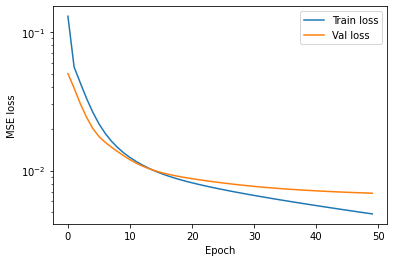

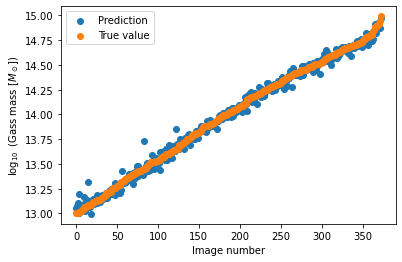

In [88]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.plot(range(len(model.epochs)), model.losses, label="Train loss")
    plt.plot(range(len(model.epochs)), model.val_losses, label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")
    plt.yscale("log")
    plt.legend()
    plt.show()


    prediction = model.model(torch.Tensor(data.testx))
    prediction = prediction * data.std_y + data.mean_y

    testx = data.testx * data.std_x[np.newaxis, :, np.newaxis, np.newaxis] + data.mean_x[np.newaxis, :, np.newaxis, np.newaxis]
    testy = data.testy * data.std_y + data.mean_y

    # print(prediction.T)
    # print(testy)
    args = np.argsort(testy)
    plt.scatter(range(len(testy)), prediction[args], label="Prediction")
    plt.scatter(range(len(testy)), testy[args], label="True value")
    plt.xlabel("Image number")
    plt.ylabel("$\log_{10}$ (Gass mass [$M_\odot$])")
    plt.legend()
    plt.show()

[-1.4786849  -1.2459648  -1.210342   ... -0.75983185 -1.3652492
 -1.5632546 ]


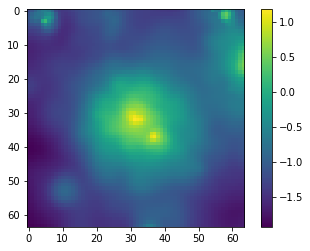

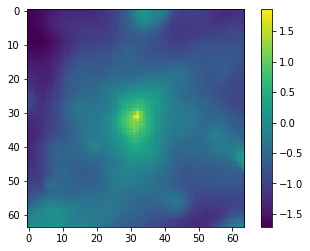

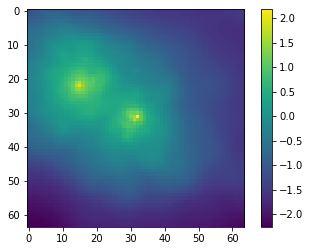

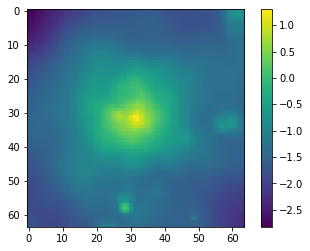

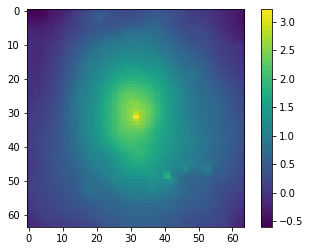

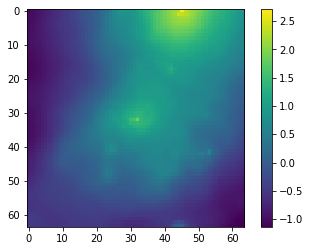

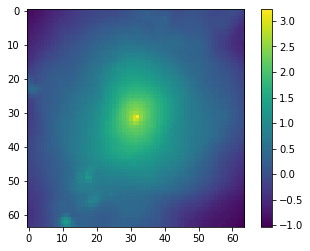

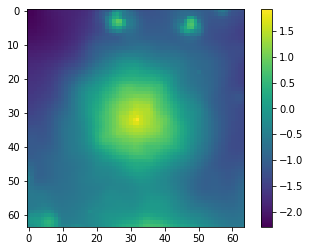

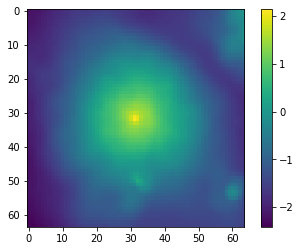

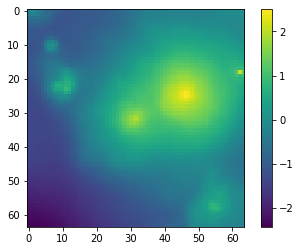

In [73]:
# test = data.testx * data.std_x + data.mean_x
# print(data.trainx[0,0])
# print(data.trainx[1,0])
print(data.trainy)
# print(data.trainy[1])
for i in range(10):
    plt.imshow(data.trainx[i,0])
    plt.colorbar()
    plt.show()

In [56]:
test = np.load(f"{p['base_data_path']}/obs_data_{p_to_filename(p)}_M1e13_rad1Mpc_halo_indices.npy")
print(test)

[ 4243878  6073953  5455886 11024850  3628391 12901838  6263811   920565
  1036212 11789570  4445297       27  3628265  6560773 10712270  7952153
  5455314  8879505  9097200  6453008]


In [62]:
print(data.soap_file[p["selection_type"]+"/TotalMass"][np.sort(test)])

[1.1503640e+14 4.9134426e+13 8.6311663e+13 1.9598795e+14 3.0511448e+13
 1.2747463e+13 1.1970933e+14 4.0462028e+14 1.7660906e+13 1.1218455e+13
 6.1503932e+13 6.8059770e+14 1.8939088e+14 3.0786326e+14 4.7059098e+14
 9.9725705e+14 3.1665935e+14 1.6612934e+13 8.5624468e+13 2.8037547e+13]
